# Importing Required Libraries
    1. Seaborn
    2. Matplotlib
    3. Pandas
    4. Numpy
    5. Scikit-Learn
    6. Scipy
    7. Math

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing CSV
    Importing CSV Using Pandas

In [2]:
df = pd.read_csv("housing.csv")
print(df)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]


# Basic Knowledge Of The Data

In [3]:
def BasicInfo(df):
    row = df.shape[0]
    col = df.columns.tolist()
    print("Rows:", row)
    print("Columns: ", col)
    print(df.dtypes)

In [4]:
BasicInfo(df)

Rows: 489
Columns:  ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


# Check For Null Values

In [5]:
print(df.isnull().sum())

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


#### If There Were Null Values, Then We Could Either Impute Them Or Delete Those Rows

# Scaling of Data
    The scaled values have a mean of 0 and an SD of 1. 
    This makes comparing and analyzing characteristics with various scales and ranges simpler. 

In [6]:
#Below Function Tells That Data Is Scaled Or Not
def TellScaled(df, col_name):
    if isinstance(df[col_name].values[0], (int, float)) and \
       (StandardScaler().fit_transform(df[[col_name]]).var() < 1.1 or \
        MinMaxScaler().fit_transform(df[[col_name]]).max() <= 1.0):
        return "Scaled"
    else:
        return "Not Scaled"
for col in df.columns:
    print(col," Is ",TellScaled(df, col))

RM  Is  Scaled
LSTAT  Is  Scaled
PTRATIO  Is  Scaled
MEDV  Is  Scaled


## Data Is Scaled But What If It Wasn't Scaled, If It Wasn't Scaled, We Would Use Below Function

In [7]:
def ScaleColumn(df, col_name):
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[col_name]])
    df[col_name + '_scaled'] = scaled_values.flatten()
    return df

In this above function, the values in the designated column col_name are scaled by creating a StandardScaler object and using its fit_transform function. A new variable called scaled_values is created to hold the scaled values. Then, we create a new column called col_name_scaled in the DataFrame with the scaled values as its values.


# Performing EDA (Exploratory Data Analysis)
    Checking If Mean, Median, Mode, Skewness, Kurtosis etc. Of Data Are Disered Or Not
    Here A Function Is Defined That Calculates EDA

In [8]:
def EDA(dataframe):
    for col in dataframe.columns:
        print(f"Column: {col}")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Mode: {df[col].mode()[0]}")
        print(f"Skewness: {skew(df[col])}")
        print(f"Kurtosis: {kurtosis(df[col])}")
        print(f"Minimum: {df[col].min()}")
        print(f"Maximum: {df[col].max()}")
        print(f"Range: {df[col].max() - df[col].min()}")
        print(f"Standard deviation: {df[col].std()}")
        print("===" * 10)

In [9]:
EDA(df)

Column: RM
Mean: 6.240288343558283
Median: 6.185
Mode: 5.713
Skewness: 0.08131486484412978
Kurtosis: 1.8555056434482697
Minimum: 3.561
Maximum: 8.398
Range: 4.837
Standard deviation: 0.6436497627572433
Column: LSTAT
Mean: 12.93963190184049
Median: 11.69
Mode: 6.36
Skewness: 0.9027806590167046
Kurtosis: 0.4765032632388091
Minimum: 1.98
Maximum: 37.97
Range: 35.99
Standard deviation: 7.081989789065133
Column: PTRATIO
Mean: 18.51656441717791
Median: 19.1
Mode: 20.2
Skewness: -0.8180584260749316
Kurtosis: -0.191337878678147
Minimum: 12.6
Maximum: 22.0
Range: 9.4
Standard deviation: 2.111267502630989
Column: MEDV
Mean: 454342.9447852761
Median: 438900.0
Mode: 525000.0
Skewness: 0.7727027196349816
Kurtosis: 1.0187500062215653
Minimum: 105000.0
Maximum: 1024800.0
Range: 919800.0
Standard deviation: 165340.27765266784


## Correlation Is A Part Of Visual EDA

<AxesSubplot: >

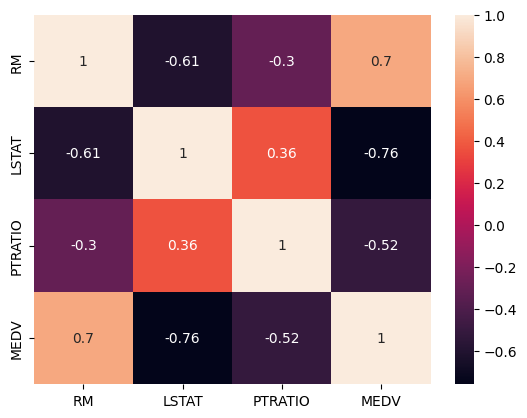

In [10]:
corr = df.corr()
sns.heatmap(corr,annot = True)

### BoxPlot Is A Part Of Visual EDA

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

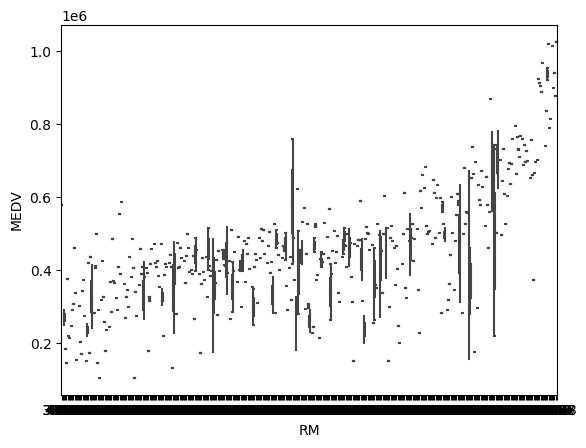

In [11]:
sns.boxplot(data=df[["RM", "MEDV"]], x = "RM", y = "MEDV")

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

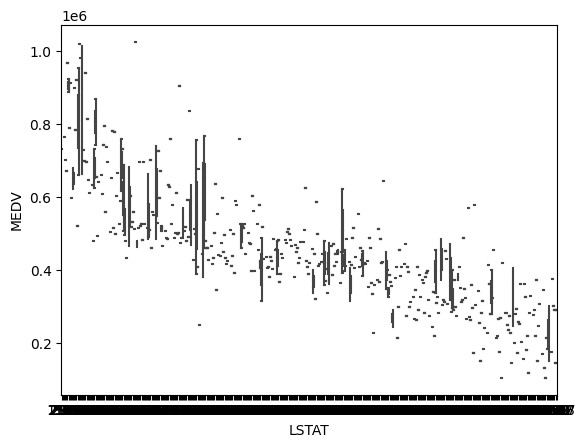

In [12]:
sns.boxplot(data=df[["LSTAT", "MEDV"]], x = "LSTAT", y = "MEDV")

<AxesSubplot: xlabel='PTRATIO', ylabel='MEDV'>

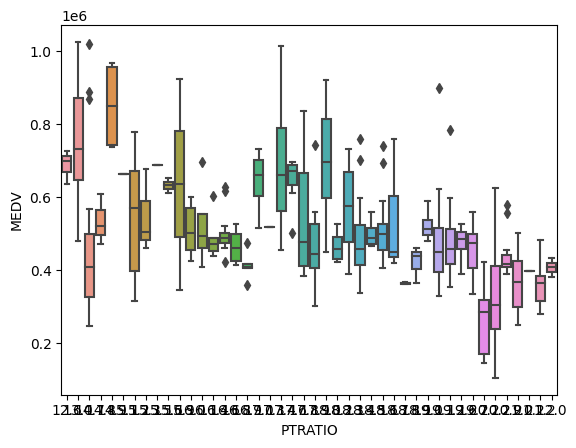

In [13]:
sns.boxplot(data=df[["PTRATIO","MEDV"]], x = "PTRATIO", y = "MEDV")

# Preprocessing Part 1 (Removing Outliers Using Z - Score)
    Z = (X - Mean)/Std. Deviation
    Z-score is a measure of how many standard deviations a data point is from the mean.
    Here Outliers Are Deleted But One Can Also Impute Them
    
#### To calculate the Z-score, you need to subtract the mean of the dataset from each data point and divide the result by the standard deviation of the dataset.
#### Typically, a Z-score threshold of 3 or -3 is used to identify outliers. Any data point with a Z-score higher than the threshold is considered an outlier.

In [14]:
Z_Scores = np.abs((df - df.mean()) / df.std())

# Define a Z-score threshold of 3
threshold = 3

# Identify and remove the outliers in each column
df = df[(Z_Scores < threshold).all(axis=1)]
print(df)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[472 rows x 4 columns]


# Preprocessing Part 2 (Removing Outliers Using InterQuartile Range)
    Interquartile Range = Q3 - Q1
    Minimum of Quartile = Q1 - (1.5 X Interquartile Range)
    Maximum of Quartile = Q3 + (1.5 X Interquartile Range)
    
    Data Points Not In Range Of Minimum of Quartile And Maximum of Quartile Are Outliers

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask based on the IQR values for each column
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Filter the DataFrame
df= df[~mask.any(axis=1)]

print(df)


        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
5    6.430   5.21     18.7  602700.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[437 rows x 4 columns]


# EDA Analysis And Analysing Basic Information Of Data After Removal Of Outliers
    EDA Analysis And Analysing Basic Information Will Be Again After Removal Of Outliers

In [16]:
BasicInfo(df)

Rows: 437
Columns:  ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


#### We Can See Rows Have Decreased

In [17]:
EDA(df)

Column: RM
Mean: 6.191700228832953
Median: 6.164
Mode: 5.713
Skewness: 0.07851630499266217
Kurtosis: 0.06549657490882499
Minimum: 4.903
Maximum: 7.42
Range: 2.5170000000000003
Standard deviation: 0.46749695021812737
Column: LSTAT
Mean: 13.006887871853547
Median: 12.14
Mode: 6.36
Skewness: 0.6689787977342265
Kurtosis: -0.1399252133179809
Minimum: 1.98
Maximum: 30.81
Range: 28.83
Standard deviation: 6.325130083063405
Column: PTRATIO
Mean: 18.705720823798625
Median: 19.1
Mode: 20.2
Skewness: -0.6847842941266543
Kurtosis: -0.5892479959384738
Minimum: 14.7
Maximum: 22.0
Range: 7.300000000000001
Standard deviation: 1.9126544417706526
Column: MEDV
Mean: 430538.44393592677
Median: 430500.0
Mode: 525000.0
Skewness: 0.12053125063423252
Kurtosis: -0.054772614601702685
Minimum: 117600.0
Maximum: 743400.0
Range: 625800.0
Standard deviation: 125688.70361302058


## Again Getting Correlation As Mentioned Above, It Is A Part Of Visual EDA

<AxesSubplot: >

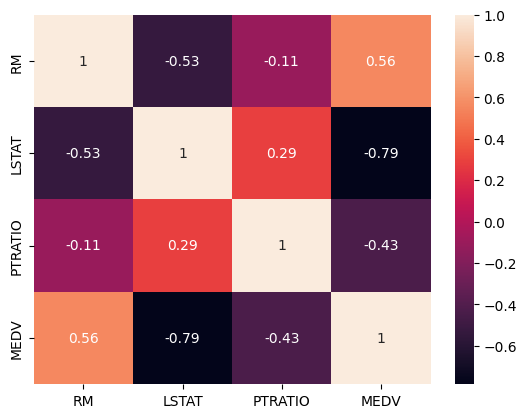

In [18]:
corr = df.corr()
sns.heatmap(corr,annot = True)

#### It Can Be Seen After Performing EDA Again That Skewness And Kurtosis Of Column: 'LSTAT' And 'PTRATIO' Are Very High, This Should Be Tackled By Using Transformation
    Log Transformation Is Used In Case Of Positive Skewness
    Box-Cox Transformation Is Preferable In Case Of Column With High Range And Negatively Skewed Data Thus:
<strong> LSTAT Will Undergo Log Transformation And PTRATIO Will Undergo Box-Cox Transformation </strong>

## LSTAT Log Transformation And Graph Plotting

Text(0.5, 1.0, 'LSTAT column after Log Transform')

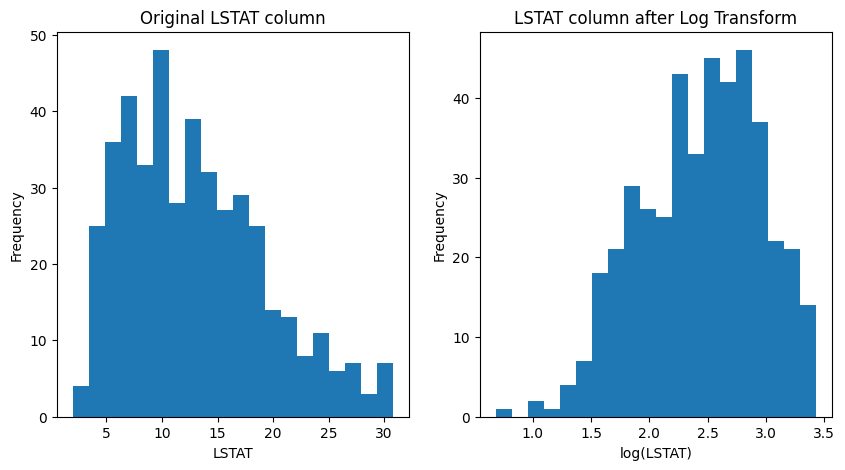

In [19]:
df['LSTAT_log'] = np.log(df['LSTAT'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(df['LSTAT'], bins=20)
ax1.set_xlabel('LSTAT')
ax1.set_ylabel('Frequency')
ax1.set_title('Original LSTAT column')
ax2.hist(df['LSTAT_log'], bins=20)
ax2.set_xlabel('log(LSTAT)')
ax2.set_ylabel('Frequency')
ax2.set_title('LSTAT column after Log Transform')

## PTRATIO Box-Cox Transformation And Graph Plotting

Text(0.5, 1.0, 'PTRATIO column after Box-Cox Transform')

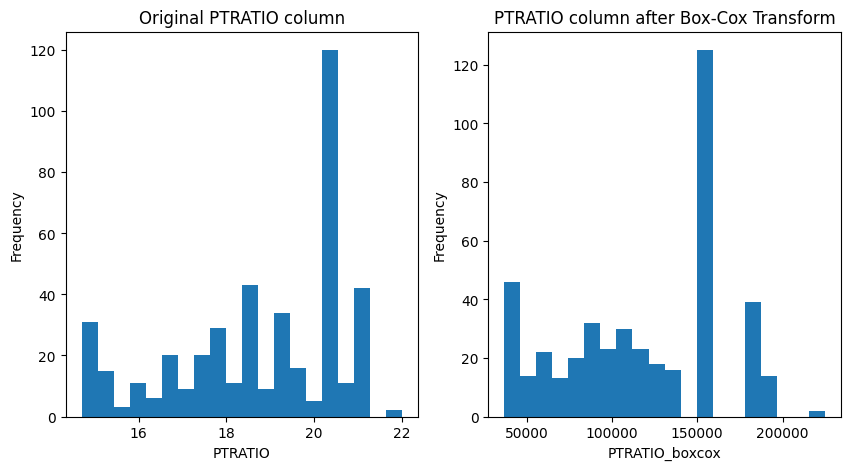

In [20]:
df['PTRATIO_boxcox'], _ = boxcox(df['PTRATIO']) #Underscore Used In LHS Discards Second Output That Is Lambda Value
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(df['PTRATIO'], bins=20)
ax1.set_xlabel('PTRATIO')
ax1.set_ylabel('Frequency')
ax1.set_title('Original PTRATIO column')
ax2.hist(df['PTRATIO_boxcox'], bins=20)
ax2.set_xlabel('PTRATIO_boxcox')
ax2.set_ylabel('Frequency')
ax2.set_title('PTRATIO column after Box-Cox Transform')


## Again Performing EDA And Analysing Basic Information To Check That If The Data Is Apt Or Not

In [21]:
BasicInfo(df)

Rows: 437
Columns:  ['RM', 'LSTAT', 'PTRATIO', 'MEDV', 'LSTAT_log', 'PTRATIO_boxcox']
RM                float64
LSTAT             float64
PTRATIO           float64
MEDV              float64
LSTAT_log         float64
PTRATIO_boxcox    float64
dtype: object


In [22]:
EDA(df)

Column: RM
Mean: 6.191700228832953
Median: 6.164
Mode: 5.713
Skewness: 0.07851630499266217
Kurtosis: 0.06549657490882499
Minimum: 4.903
Maximum: 7.42
Range: 2.5170000000000003
Standard deviation: 0.46749695021812737
Column: LSTAT
Mean: 13.006887871853547
Median: 12.14
Mode: 6.36
Skewness: 0.6689787977342265
Kurtosis: -0.1399252133179809
Minimum: 1.98
Maximum: 30.81
Range: 28.83
Standard deviation: 6.325130083063405
Column: PTRATIO
Mean: 18.705720823798625
Median: 19.1
Mode: 20.2
Skewness: -0.6847842941266543
Kurtosis: -0.5892479959384738
Minimum: 14.7
Maximum: 22.0
Range: 7.300000000000001
Standard deviation: 1.9126544417706526
Column: MEDV
Mean: 430538.44393592677
Median: 430500.0
Mode: 525000.0
Skewness: 0.12053125063423252
Kurtosis: -0.054772614601702685
Minimum: 117600.0
Maximum: 743400.0
Range: 625800.0
Standard deviation: 125688.70361302058
Column: LSTAT_log
Mean: 2.439914391214087
Median: 2.4965057856313524
Mode: 1.8500283773520307
Skewness: -0.3324400062204822
Kurtosis: -0.4584

## Again Getting Correlation As Mentioned Above, It Is A Part Of Visual EDA

<AxesSubplot: >

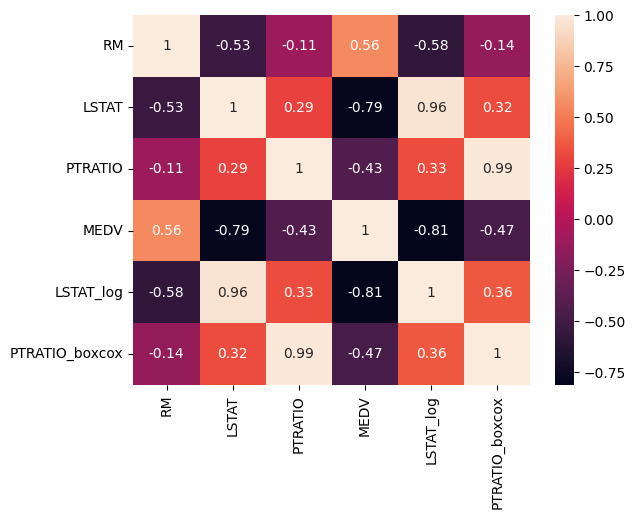

In [23]:
corr = df.corr()
sns.heatmap(corr,annot = True)

### Look At The Correlation Of Target Column That Is 'MEDV', 'PTRATIO_boxcox' Gives The Least Correlation
    We Aren't Considering PTRATIO As It Has Been Transformed Using Box-Cox Transformation
### Now We Can Either Fit Data By Taking 'PTRATIO_boxcox' Account Or Not, We'll Do Both Ways And Compare

In [24]:
X1 = df[["RM", "LSTAT_log", "PTRATIO_boxcox"]]
Y1 = df[["MEDV"]]
X2 = df[["RM", "LSTAT_log"]]
Y2 = df[["MEDV"]]

# Train Test Split (Taking Both (X1, Y1) And (X2, Y2) In Account)

In [25]:
x1train, x1test, y1train, y1test = train_test_split(X1, Y1, test_size = 0.3)
x2train, x2test, y2train, y2test = train_test_split(X2, Y2, test_size = 0.3)

# Fitting Both X1, Y1 And X2, Y2

In [26]:
reg1 = LinearRegression().fit(x1train, y1train,sample_weight=None)
reg2 = LinearRegression().fit(x2train, y2train,sample_weight=None)
y1_predicted = reg1.predict(x1test)
y2_predicted = reg2.predict(x2test)

# R2 Score Of Both Models

In [27]:
print("R^2 Score When PTRatio_boxcox Taken In Account:", r2_score(y1test, y1_predicted))
print("R^2 Score When PTRATIO_boxcox Taken Not In Account:", r2_score(y2test, y2_predicted))

R^2 Score When PTRatio_boxcox Taken In Account: 0.7193896918400678
R^2 Score When PTRATIO_boxcox Taken Not In Account: 0.6639402631475706


# We Can't Compare These Models By R2 Score As Independent Variables Are Different In Both Models Thus We'll Use Adj. R2 Score

In [28]:
Adj_r2_1 = 1 - (1-r2_score(y1test, y1_predicted)) * (len(Y1)-1)/(len(Y1)-X1.shape[1]-1)
print("Adjusted R^2 Score When PTRatio_boxcox Taken In Account:", Adj_r2_1)

Adj_r2_2 = 1 - (1-r2_score(y2test, y2_predicted)) * (len(Y2)-1)/(len(Y2)-X2.shape[1]-1)
print("Adjusted R^2 Score When PTRatio_boxcox Taken Not In Account:", Adj_r2_2)

Adjusted R^2 Score When PTRatio_boxcox Taken In Account: 0.7174455095664425
Adjusted R^2 Score When PTRatio_boxcox Taken Not In Account: 0.6623916007657622


## It's Better, When 'PTRATIO_boxcox' Is Taken In Account According To Adjusted R2

# Evaluation Metrics When 'PTRATIO_boxcox' Is Taken In Account

In [29]:
MSE1 = mean_squared_error(y1test, y1_predicted)
print("Mean Squared Error: ", MSE1)
print("Root Mean Squared Error: ", math.sqrt(MSE1))
residual1 = y1test - y1_predicted
sum_squares_resid1 = np.sum(residual1**2)
print("Sum of Squares of Residual: ", sum_squares_resid1.values[0])

Mean Squared Error:  4504720258.4035425
Root Mean Squared Error:  67117.21283250328
Sum of Squares of Residual:  594623074109.2676


# Evaluation Metrics When 'PTRATIO_boxcox' Is Not Taken In Account

In [30]:
MSE2 = mean_squared_error(y2test, y2_predicted)
print("Mean Squared Error: ", MSE2)
print("Root Mean Squared Error: ", math.sqrt(MSE2))
residual2 = y2test - y2_predicted
sum_squares_resid2 = np.sum(residual2**2)
print("Sum of Squares of Residual: ", sum_squares_resid2.values[0])

Mean Squared Error:  5398832431.415238
Root Mean Squared Error:  73476.74755604823
Sum of Squares of Residual:  712645880946.8115
